In [106]:
import numpy as np
import matplotlib.pyplot as plt
import glob, importlib
from natsort import natsorted
import bead_utils as bu
import scipy.signal as sp
import matplotlib.dates as mdates

Script to analyze the changes in charge vs time from Jiaxiang's data

In [98]:
data_path = ["/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/jiaxiang_data/20230803/1/",]
            #"/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/jiaxiang_data/20230803/2/"]


In [99]:
importlib.reload(bu)
flist = []
for d in data_path:
    flist += natsorted(glob.glob(d + "*.h5"))

## first make a correlation template
cdat, attr, _ = bu.get_data(flist[0])
template = bu.correlation_template(cdat, attr, make_plots=False)

charge_vec = []

for i,f in enumerate(flist):

    if(i%10 == 0): print("working on file %d: %s"%(i, f))
    
    cdat, attr, _ = bu.get_data(f)

    #bu.plot_raw_data(cdat, attr, nfft=2**19, do_psd=True, do_filt=True)
    
    fname = "corr_%d.png"%i
    corr_val = bu.plot_correlation_with_drive(cdat, template, attr, skip_drive=True)

    time = attr["Time"]

    charge_vec.append([time, corr_val])

np.save("charge_steps.npy", charge_vec)

working on file 0: /Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/jiaxiang_data/20230803/1/LPmbar_xyzcool_0.h5
working on file 10: /Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/jiaxiang_data/20230803/1/LPmbar_xyzcool_10.h5
working on file 20: /Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/jiaxiang_data/20230803/1/LPmbar_xyzcool_20.h5
working on file 30: /Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/jiaxiang_data/20230803/1/LPmbar_xyzcool_30.h5
working on file 40: /Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/jiaxiang_data/20230803/1/LPmbar_xyzcool_40.h5
working on file 50: /Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/jiaxiang_data/20230803/1/LPmbar_xyzcool_50.h5
working on file 60: /Users/dcmoore/Library

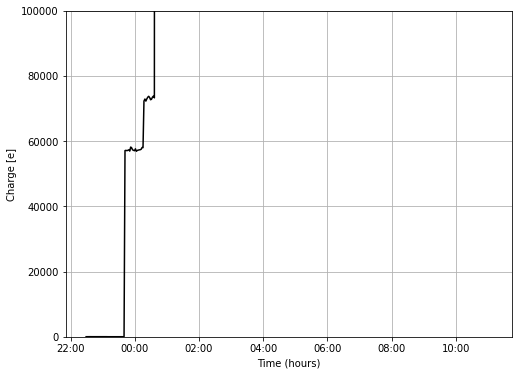

In [110]:
charge_vec = np.load("charge_steps.npy")

cal_fac = 1e4 ## wild guess

dt = []
for j,t in enumerate(charge_vec[:,0]):
    dt.append(bu.labview_time_to_datetime(t))

plt.figure(figsize=(8,6))
plt.plot_date(dt, charge_vec[:,1], 'k-')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xlabel("Time (hours)")
plt.ylabel("Charge [e]")
plt.grid(True)
plt.ylim(0,10)
plt.show()